<a href="https://colab.research.google.com/github/nishi1612/Machine-Learning-For-Data-Mining/blob/master/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [0]:
def graph():
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.show()

In [0]:
N = 50
M = 2

In [0]:
def generate_input(N,M):
  mu = np.random.random((M,1))
  sigma = np.random.random((M,1))
  X = np.ones((N,M+1))
  for i in range(M):
     X[:,i] = np.random.normal(mu[i],sigma[i],N)
  return X

In [0]:
def predict_output(X,weight):
  return np.matmul(X,weight)

In [0]:
def generate_output(X,M):
  weight = np.random.random((M+1,1))
  Y = predict_output(X,weight)
  return weight, Y

In [0]:
def add_noise(Y,N):
  noise = np.random.random((N,1))
  Y_noise = Y+noise
  return Y_noise

In [0]:
def closed_form(X,Y_noise):
  a = np.linalg.inv(np.matmul(X.transpose(),X))
  b = np.matmul(a,X.transpose())
  weight_predicted = np.matmul(b,Y_noise)
  return weight_predicted

In [0]:
def calculate_mse(y_predicted,y,N):
  mse = np.sum((y_predicted - y)**2)
  return mse/N

**Closed form solution**

In [11]:
X = generate_input(N,M)
weight, Y = generate_output(X,M)
Y_noise = add_noise(Y,N)
weight_predicted = closed_form(X,Y_noise)
y_predicted = predict_output(X,weight_predicted)
mse = calculate_mse(y_predicted,Y_noise,N)
mse

0.07538835285100688

In [12]:
X.shape, weight.shape

((50, 3), (3, 1))

In [0]:
def gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.0000001]
  for alpha in alphas:
    theta = np.ones((X.shape[1],1))
    h = predict_output(X,theta)
    cost = np.zeros((epochs,1))
    for i in range(epochs):
        theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
        for j in range(1,X.shape[1]):
          theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
          h = predict_output(X,theta)
        cost[i] = calculate_mse(Y,h,X.shape[0])
        if(i>0 and cost[i]>cost[i-1]):
          epochs = i
          break
        if(i%50000==0):
          print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.0000001):
      return theta

**Gradient Descent Method for multi variable linear regression**

Epoch :  0  Cost :  [0.41253651]
Epoch :  50000  Cost :  [0.29676466]
Epoch :  100000  Cost :  [0.24137038]
Epoch :  150000  Cost :  [0.21365775]
Epoch :  200000  Cost :  [0.19911706]
Epoch :  250000  Cost :  [0.19112506]
Epoch :  300000  Cost :  [0.18654717]
Epoch :  350000  Cost :  [0.18383457]
Epoch :  400000  Cost :  [0.18218494]
Epoch :  450000  Cost :  [0.18116262]
Epoch :  500000  Cost :  [0.18052063]
Epoch :  550000  Cost :  [0.18011382]
Epoch :  600000  Cost :  [0.17985449]
Epoch :  650000  Cost :  [0.17968851]
Epoch :  700000  Cost :  [0.179582]
Epoch :  750000  Cost :  [0.17951353]
Epoch :  800000  Cost :  [0.17946948]
Epoch :  850000  Cost :  [0.17944111]
Epoch :  900000  Cost :  [0.17942283]
Epoch :  950000  Cost :  [0.17941105]


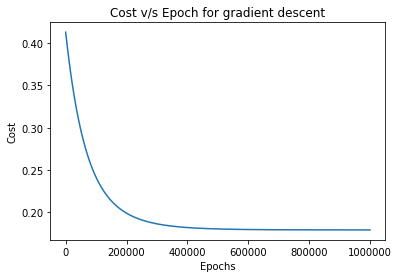

0.1794034599142204

In [14]:
weight_predicted = gradient_descent(X,Y_noise)
y_predicted = predict_output(X,weight_predicted)
mse = calculate_mse(y_predicted,Y_noise,N)
mse

In [15]:
weight_predicted, weight

(array([[0.99600463],
        [0.82827291],
        [0.80023247]]), array([[0.71070982],
        [0.47690888],
        [0.86280381]]))

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def logistic_cost(y_actual,y_predicted):
  return np.sum(((-y_actual*np.log(y_predicted)) - ((1-y_actual)*np.log(1-y_predicted))))/y_predicted.shape[0]

In [0]:
def logistic_output(X,theta):
  t = sigmoid(np.dot(X,theta))
  for i in range(t.shape[0]):
    if(t[i]<0.5):
      t[i]=0
    else:
      t[i]=1
  return t

In [0]:
def logistic_gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.000001]
  for alpha in alphas:
    theta = np.ones((X.shape[1],1))
    h = sigmoid(np.dot(X,theta))
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        h = sigmoid(np.dot(X,theta))
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%50000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.000001):
      return theta

In [0]:
def prediction_table(y_actual,y_predicted):
  table = pd.DataFrame(columns=['Positive','Negative'])
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(y_predicted.shape[0]):
    if(y_actual[i]==1):
      if(y_predicted[i]==1):
        tp+=1
      else:
        fn+=1
    elif(y_actual[i]==0):
      if(y_predicted[i]==1):
        fp+=1
      else:
        tn+=1
  table.loc['Positive'] = [tp,fp]
  table.loc['Negative'] = [fn,tn]
  return table

**Gradient Descent Solution for multi variable logistic regression**

Epoch :  0  Cost :  [0.09379424]
Epoch :  50000  Cost :  [0.07455909]
Epoch :  100000  Cost :  [0.06222889]
Epoch :  150000  Cost :  [0.05362479]
Epoch :  200000  Cost :  [0.04726267]
Epoch :  250000  Cost :  [0.04235649]
Epoch :  300000  Cost :  [0.03845068]
Epoch :  350000  Cost :  [0.03526274]
Epoch :  400000  Cost :  [0.032608]
Epoch :  450000  Cost :  [0.03036054]
Epoch :  500000  Cost :  [0.02843148]
Epoch :  550000  Cost :  [0.02675626]
Epoch :  600000  Cost :  [0.02528679]
Epoch :  650000  Cost :  [0.02398653]
Epoch :  700000  Cost :  [0.02282718]
Epoch :  750000  Cost :  [0.02178647]
Epoch :  800000  Cost :  [0.02084664]
Epoch :  850000  Cost :  [0.01999335]
Epoch :  900000  Cost :  [0.01921487]
Epoch :  950000  Cost :  [0.01850153]


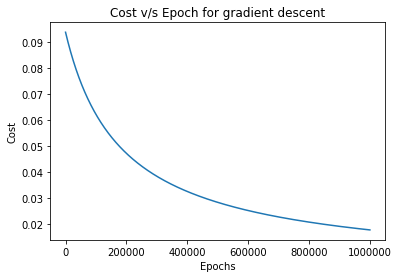

0.017845272509944988

In [27]:
y_categorical = logistic_output(X,weight)
weight_predicted = logistic_gradient_descent(X,y_categorical)
y_hat = sigmoid(np.dot(X,weight_predicted))
cost = logistic_cost(y_categorical,y_hat)
y_predicted = logistic_output(X,weight_predicted)
cost

In [28]:
df = prediction_table(y_categorical,y_predicted)
df

,Positive,Negative
Positive,50,0
Negative,0,0


In [29]:
weight_predicted , weight

(array([[1.03316124],
        [2.42532212],
        [2.65806154]]), array([[0.71070982],
        [0.47690888],
        [0.86280381]]))

In [30]:
zeros=0
ones=0
for i in range(y_categorical.shape[0]):
  if(y_categorical[i][0]==0):
    zeros+=1
  else:
    ones+=1
print(zeros,ones)

0 50


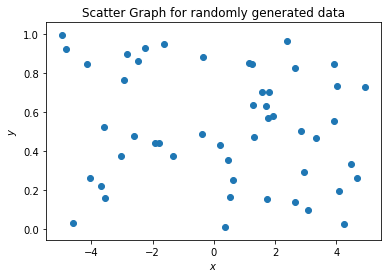

In [52]:
x = np.random.uniform(-5,5,(50,1))
y = np.random.uniform(0,1,(50,1))
plt.scatter(x,y)
plt.title('Scatter Graph for randomly generated data')
graph()

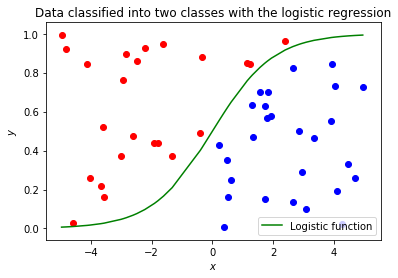

In [49]:
labels = np.zeros((x.shape[0],1))
vals = np.zeros((x.shape[0],1))
for i in range(x.shape[0]):
  if(y[i]<1/(1 + math.exp(-x[i]))):
    labels[i]=0
  else:
    labels[i]=1
for i in range(x.shape[0]):
  if(labels[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green',label='Logistic function')
plt.legend()
plt.title('Data classified into two classes with the logistic regression')
graph()

In [0]:
X = np.zeros((x.shape[0],2))
X[:,1] = x[:,0]
X[:,0] = np.ones(x.shape[0])
Y = labels

In [0]:
def logistic_gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.00001]
  for alpha in alphas:
    theta = np.zeros((X.shape[1],1))
    h = sigmoid(np.dot(X,theta))
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        h = sigmoid(np.dot(X,theta))
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%50000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.00001):
      return theta

Epoch :  0  Cost :  [0.69313998]
Epoch :  50000  Cost :  [0.48157614]
Epoch :  100000  Cost :  [0.40518043]
Epoch :  150000  Cost :  [0.37056786]
Epoch :  200000  Cost :  [0.35251088]
Epoch :  250000  Cost :  [0.34227166]
Epoch :  300000  Cost :  [0.33616436]
Epoch :  350000  Cost :  [0.33240533]
Epoch :  400000  Cost :  [0.33004529]
Epoch :  450000  Cost :  [0.3285447]
Epoch :  500000  Cost :  [0.32758278]
Epoch :  550000  Cost :  [0.32696291]
Epoch :  600000  Cost :  [0.32656211]
Epoch :  650000  Cost :  [0.32630237]
Epoch :  700000  Cost :  [0.32613382]
Epoch :  750000  Cost :  [0.32602433]
Epoch :  800000  Cost :  [0.32595317]
Epoch :  850000  Cost :  [0.3259069]
Epoch :  900000  Cost :  [0.32587681]
Epoch :  950000  Cost :  [0.32585723]


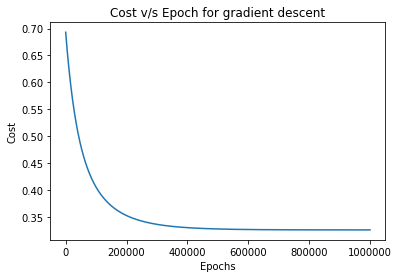

0.32584449716679215

In [37]:
weight_predicted = logistic_gradient_descent(X,Y)
y_hat = sigmoid(np.dot(X,weight_predicted))
cost = logistic_cost(Y,y_hat)
y_predicted = logistic_output(X,weight_predicted)
cost

In [38]:
df = prediction_table(Y,y_predicted)
df

,Positive,Negative
Positive,20,0
Negative,3,27


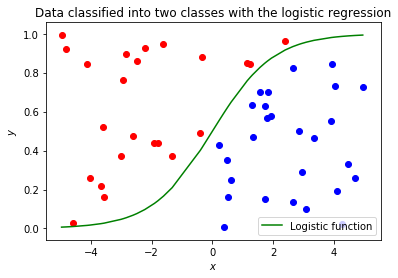

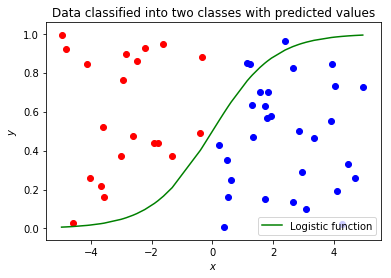

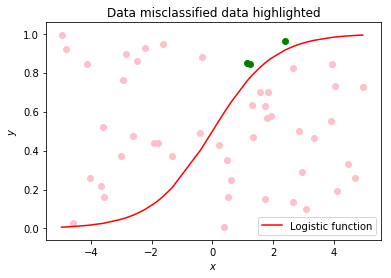

In [50]:
for i in range(x.shape[0]):
  if(labels[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green',label='Logistic function')
plt.legend()
plt.title('Data classified into two classes with the logistic regression')
graph()
for i in range(x.shape[0]):
  if(y_predicted[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green',label='Logistic function')
plt.legend()
plt.title('Data classified into two classes with predicted values')
graph()
for i in range(x.shape[0]):
  if(y_predicted[i]==labels[i]):
    plt.scatter(x[i],y[i],color='pink')
  else:
    plt.scatter(x[i],y[i],color='green')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='red',label='Logistic function')
plt.legend()
plt.title('Data misclassified data highlighted')
graph()

In [40]:
weight_predicted

array([[-0.03434416],
       [-0.51672901]])

In [41]:
weight_predicted.shape

(2, 1)

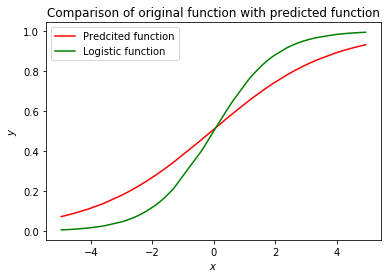

In [51]:
t = np.sort(x,axis=0)
plt.plot(t,1/(1+np.exp(t*weight_predicted[1][0] + weight_predicted[0][0])),color='red',label='Predcited function')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green',label='Logistic function')
plt.legend()
plt.title('Comparison of original function with predicted function')
graph()